In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import matplotlib as m


In [22]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/99.8 MB 7.4 MB/s eta 0:00:14
   ---------------------------------------- 0.4/99.8 MB 5.4 MB/s eta 0:00:19
   ---------------------------------------- 0.8/99.8 MB 6.4 MB/s eta 0:00:16
   ---------------------------------------- 1.2/99.8 MB 6.8 MB/s eta 0:00:15
    --------------------------------------- 1.5/99.8 MB 7.5 MB/s eta 0:00:14
    --------------------------------------- 1.7/99.8 MB 7.3 MB/s eta 0:00:14
    --------------------------------------- 2.1/99.8 MB 6.7 MB/s eta 0:00:15
   - -------------------------------------- 2.6/99.8 MB 7.1 MB/s eta 0:00:14
   - -------------------------------------- 2.9/99.8 MB 7.2 MB/s eta 0:00:14
   - ---------------------------

In [3]:
df = pd.read_csv('../Project_4/text.zip',compression='zip')
df

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


In [4]:
df['text'][0]

'i just feel really helpless and heavy hearted'

In [3]:
df['label'].value_counts()

1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: label, dtype: int64

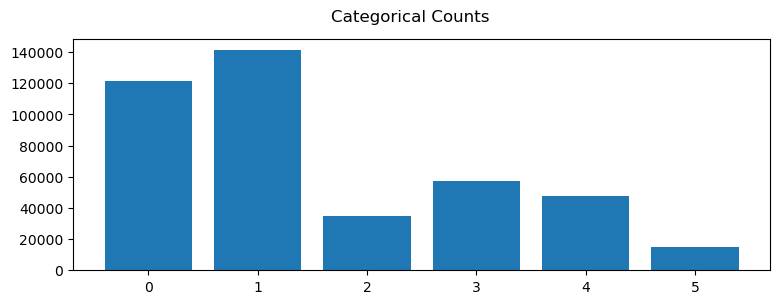

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 3))
plt.bar(df['label'].value_counts().index, df['label'].value_counts())
plt.suptitle('Categorical Counts')
#https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py
plt.show()

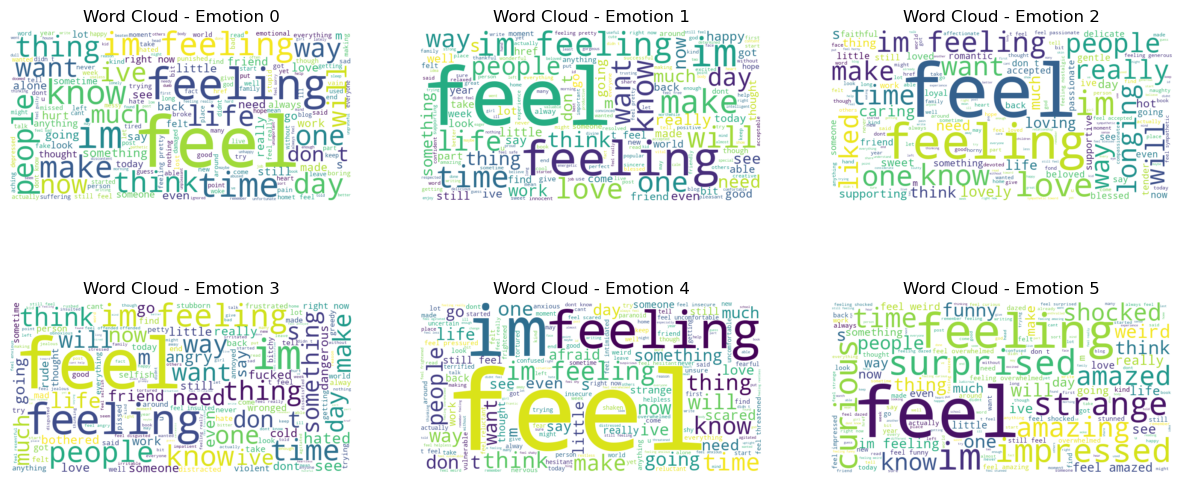

In [16]:
from wordcloud import WordCloud
#https://www.kaggle.com/code/nelgiriyewithana/an-introduction-to-emotions-dataset
emotions = df['label'].unique()
plt.figure(figsize=(15, 10))
for emotion in emotions:
    subset = df[df['label'] == emotion]
    text = ' '.join(subset['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.subplot(3, 3, emotion+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - Emotion {emotion}')
    plt.axis('off')
plt.show()

ML Model